In [105]:
from torchvision import datasets
data_path = r'D:\FunnyProgramming\PythonProject\SummerPrac\data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

type(cifar10).__mro__


Files already downloaded and verified
Files already downloaded and verified


(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [106]:
len(cifar10), len(cifar10_val)

(50000, 10000)

In [107]:
img, label = cifar10[99]
img, label, cifar10.classes[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

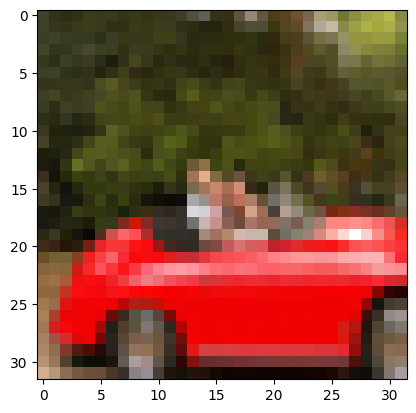

In [108]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [109]:
type(img)

PIL.Image.Image

In [110]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [111]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.max(), img_t.min()

(tensor(1.), tensor(0.))

In [112]:
# normalize data
import torch
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.Compose([to_tensor, transforms.RandomCrop(24)]))
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.Compose([to_tensor, transforms.RandomCrop(24)]))
imgs = torch.stack([img for img, label in tensor_cifar10], dim=3)
mean = imgs.view(3, -1).mean(dim=1)

Files already downloaded and verified
Files already downloaded and verified


In [113]:
stddev = imgs.view(3, -1).std(dim=1)
stddev, mean

(tensor([0.2413, 0.2374, 0.2529]), tensor([0.4893, 0.4724, 0.4364]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


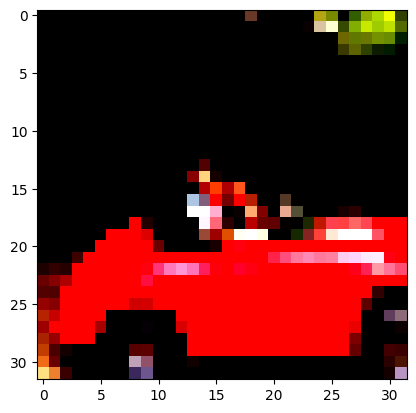

In [114]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean, stddev)
                                       ]))
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [115]:
# classify bird and plane
label_map = {0:0, 2:1}
class_name = {'airplane', 'bird'}
transformed_cifar10.classes[0], transformed_cifar10.classes[2]

('airplane', 'bird')

In [116]:
cifar2 = [(img, label_map[label]) for img, label in tensor_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in tensor_cifar10_val if label in [0, 2]]

In [126]:
import torch
from torch.utils.data import DataLoader
from torch import nn
from torch import optim

train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features=1728, out_features=1024),
    nn.Tanh(),
    nn.Linear(in_features=1024, out_features=512),
    nn.Tanh(),
    nn.Linear(in_features=512, out_features=128),
    nn.Tanh(),
    nn.Linear(in_features=128, out_features=2),
    nn.Softmax(dim=-1)
)

device = torch.device("cuda")
model = model.to(device)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

for epoch in range(1, n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        batch_size = imgs.shape[0]
        true_labels = torch.zeros(batch_size, 2).to(device)
        true_labels.scatter_(1, labels.unsqueeze(-1), 1.0)


        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, true_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, loss.item()))

Epoch: 1, Loss: 0.233233
Epoch: 2, Loss: 0.179745
Epoch: 3, Loss: 0.145816
Epoch: 4, Loss: 0.242898
Epoch: 5, Loss: 0.182528
Epoch: 6, Loss: 0.123859
Epoch: 7, Loss: 0.142675
Epoch: 8, Loss: 0.144666
Epoch: 9, Loss: 0.242480
Epoch: 10, Loss: 0.189070
Epoch: 11, Loss: 0.291840
Epoch: 12, Loss: 0.216479
Epoch: 13, Loss: 0.338327
Epoch: 14, Loss: 0.203716
Epoch: 15, Loss: 0.130138
Epoch: 16, Loss: 0.155757
Epoch: 17, Loss: 0.051119
Epoch: 18, Loss: 0.237348
Epoch: 19, Loss: 0.156156
Epoch: 20, Loss: 0.138426
Epoch: 21, Loss: 0.121783
Epoch: 22, Loss: 0.219692
Epoch: 23, Loss: 0.129341
Epoch: 24, Loss: 0.181166
Epoch: 25, Loss: 0.200577
Epoch: 26, Loss: 0.129184
Epoch: 27, Loss: 0.263983
Epoch: 28, Loss: 0.160810
Epoch: 29, Loss: 0.110397
Epoch: 30, Loss: 0.196617
Epoch: 31, Loss: 0.160061
Epoch: 32, Loss: 0.141711
Epoch: 33, Loss: 0.202270
Epoch: 34, Loss: 0.067130
Epoch: 35, Loss: 0.167287
Epoch: 36, Loss: 0.131335
Epoch: 37, Loss: 0.111822
Epoch: 38, Loss: 0.115722
Epoch: 39, Loss: 0.13

In [127]:
# test model
val_loader = DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += batch_size
        correct += (predicted == labels).sum()
print('Accuracy: %f' % (correct/total))
numel_list = [p.numel() for p in model.parameters() if p.requires_grad==True]
print('Total number of parameters: %f' % (sum(numel_list)))

Accuracy: 0.807500
Total number of parameters: 2361218.000000
